<h3>Load the Dataset into a DataFrame</h3>

In [19]:
import pandas as pd

data = {
    'id': list(range(1, 21)),
    'age': [22, 24, 26, 29, 31, 35, 38, 41, 44, 47,
            50, 53, 55, 58, 60, 63, 66, 68, 71, 74],
    'income': [35000, 38000, 40000, 42000, 48000, 60000, 68000, 75000, 82000, 90000,
               97000, 110000, 117000, 125000, 135000, 150000, 160000, 170000, 185000, 200000]
}

df = pd.DataFrame(data)


<h3>Explore the Data</h3>

In [20]:
print(df.head())
print(df.describe())


   id  age  income
0   1   22   35000
1   2   24   38000
2   3   26   40000
3   4   29   42000
4   5   31   48000
             id        age         income
count  20.00000  20.000000      20.000000
mean   10.50000  47.750000  101350.000000
std     5.91608  16.536642   52237.589813
min     1.00000  22.000000   35000.000000
25%     5.75000  34.000000   57000.000000
50%    10.50000  48.500000   93500.000000
75%    15.25000  60.750000  138750.000000
max    20.00000  74.000000  200000.000000


<h3>Perform Equal-Width Binning on age</h3>

In [21]:
n_bins = 4  # Choose how many bins you'd like
age_labels = [f"Group{i}" for i in range(1, n_bins + 1)]

df["age_bin_equal_width"] = pd.cut(df["age"], bins=n_bins, labels=age_labels)
print(df[["age", "age_bin_equal_width"]])


    age age_bin_equal_width
0    22              Group1
1    24              Group1
2    26              Group1
3    29              Group1
4    31              Group1
5    35              Group1
6    38              Group2
7    41              Group2
8    44              Group2
9    47              Group2
10   50              Group3
11   53              Group3
12   55              Group3
13   58              Group3
14   60              Group3
15   63              Group4
16   66              Group4
17   68              Group4
18   71              Group4
19   74              Group4


<h3>Check how many data points fall into each bin</h3>

In [22]:
print(df["age_bin_equal_width"].value_counts().sort_index())

age_bin_equal_width
Group1    6
Group2    4
Group3    5
Group4    5
Name: count, dtype: int64


<h3>Perform Equal-Frequency Binning on income</h3>

In [23]:
q_bins = 4
income_labels = [f"Q{i}" for i in range(1, q_bins + 1)]

df["income_bin_quantile"] = pd.qcut(df["income"], q=q_bins, labels=income_labels)
print(df[["income", "income_bin_quantile"]])
print(df["income_bin_quantile"].value_counts().sort_index())


    income income_bin_quantile
0    35000                  Q1
1    38000                  Q1
2    40000                  Q1
3    42000                  Q1
4    48000                  Q1
5    60000                  Q2
6    68000                  Q2
7    75000                  Q2
8    82000                  Q2
9    90000                  Q2
10   97000                  Q3
11  110000                  Q3
12  117000                  Q3
13  125000                  Q3
14  135000                  Q3
15  150000                  Q4
16  160000                  Q4
17  170000                  Q4
18  185000                  Q4
19  200000                  Q4
income_bin_quantile
Q1    5
Q2    5
Q3    5
Q4    5
Name: count, dtype: int64


<h3>Visualize the Original Continuous Data</h3>

<h4>Histogram for Age</h4>

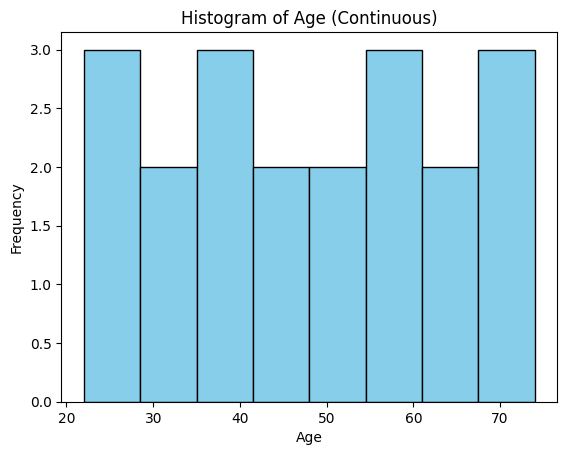

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["age"], bins=8, color='skyblue', edgecolor='black')
plt.title("Histogram of Age (Continuous)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



<h4>Histogram for Income</h4>

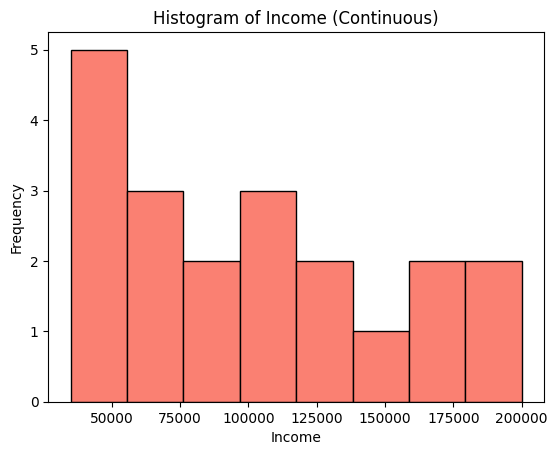

In [25]:
# Histogram for Income
plt.figure()
plt.hist(df["income"], bins=8, color='salmon', edgecolor='black')
plt.title("Histogram of Income (Continuous)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


<h3>Visualize Binned Data with Bar Plots</h3>

<h4>Bar Plot for Equal-Width Age Bins</h4>

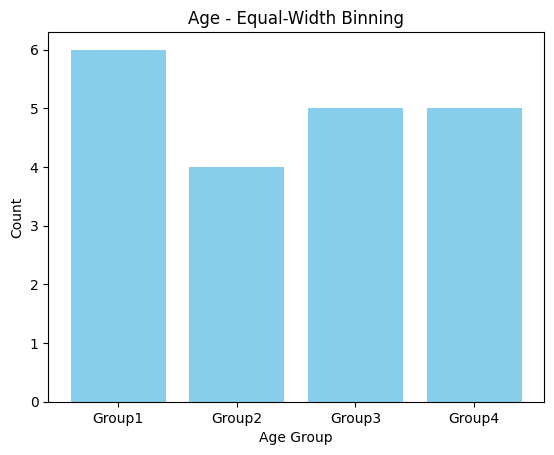

In [26]:
age_counts = df["age_bin_equal_width"].value_counts().sort_index()

plt.figure()
plt.bar(age_counts.index.astype(str), age_counts.values, color='skyblue')
plt.title("Age - Equal-Width Binning")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

<h4>Bar Plot for Quantile Income Bins</h4>

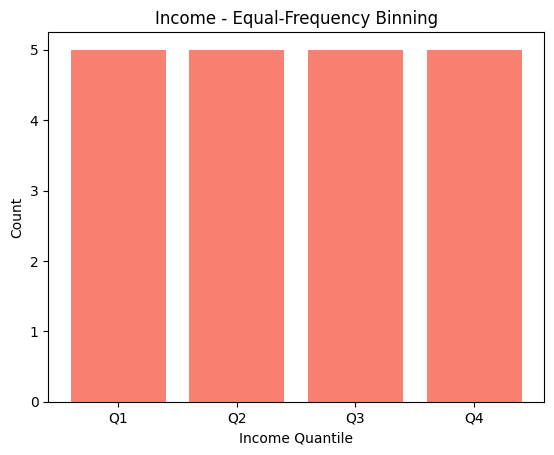

In [27]:
income_counts = df["income_bin_quantile"].value_counts().sort_index()

plt.figure()
plt.bar(income_counts.index.astype(str), income_counts.values, color='salmon')
plt.title("Income - Equal-Frequency Binning")
plt.xlabel("Income Quantile")
plt.ylabel("Count")
plt.show()

<h3>Final Output</h3>
# Optional: Preview DataFrame with new binned columns

In [28]:
print(df[["id", "age", "age_bin_equal_width", "income", "income_bin_quantile"]])


    id  age age_bin_equal_width  income income_bin_quantile
0    1   22              Group1   35000                  Q1
1    2   24              Group1   38000                  Q1
2    3   26              Group1   40000                  Q1
3    4   29              Group1   42000                  Q1
4    5   31              Group1   48000                  Q1
5    6   35              Group1   60000                  Q2
6    7   38              Group2   68000                  Q2
7    8   41              Group2   75000                  Q2
8    9   44              Group2   82000                  Q2
9   10   47              Group2   90000                  Q2
10  11   50              Group3   97000                  Q3
11  12   53              Group3  110000                  Q3
12  13   55              Group3  117000                  Q3
13  14   58              Group3  125000                  Q3
14  15   60              Group3  135000                  Q3
15  16   63              Group4  150000 

<h3>Learning Summary</h3>
<li>pd.cut() is used for dividing data into equal-sized intervals based on range.</li>
<li>pd.qcut() is used to divide data into quantile-based bins.</li>
<li>Bar plots are effective for visualizing categorical (binned) distributions.</li>
<li>This technique is useful for categorizing continuous features in machine learning or analysis.</li>

